# Linear Regression

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression Using Ordinary Least Squares

In [2]:
class OrdinaryLeastSquaresRegression:
    """
    Ordinary Least Squares Regression model.
    
    Parameters:
    - intercept: bool, default=False
        Whether to include an intercept term in the model.
    
    Attributes:
    - r_square: float or None
        Coefficient of determination (R^2) of the prediction.
    - adj_r_square: float or None
        Adjusted R^2 value of the prediction.
    - coeff>: numpy.ndarray
        Coefficeints of regression model.
    - bias_: numpy.ndarray
        bias of the regression model.
    - independent_variables: int or None
        Number of independent variables (features) in the model.
    """
    
    def __init__(self, intercept=False):
        """
        Initialize the OrdinaryLeastSquaresRegression object.
        
        Parameters:
        - intercept: bool, default=False
            Whether to include an intercept term in the model.
        """
        self.r_square = None
        self.adj_r_square = None
        self.coeff_ = None
        self.bias_ = None
        self.intercept = intercept
        self.independent_variables = None
        self.theta_ = None
    
    def fit(self, X, y):
        """
        Fit the regression model to the training data.
        
        Parameters:
        - X: numpy.ndarray
            Features (independent variables) of the training data.
        - y: numpy.ndarray
            Target variable (dependent variable) of the training data.
        
        Raises:
        - ValueError: If the number of rows in X and y are not equal.
        """
        if len(X) != len(y):
            raise ValueError("Features and Target value should have the same number of rows")
        
        # Include intercept term if specified
        if self.intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        
        # Calculate coefficients using the normal equation
        theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
        self.theta_ = theta
        # Separate coefficients and bias
        self.coeff_ = theta[:-1]
        self.bias_ = theta[-1]
        self.independent_variables = len(X.T)
        
    def predict(self, X):
        """
        Make predictions using the fitted model.
        
        Parameters:
        - X: numpy.ndarray
            Features (independent variables) of the data to predict.
        
        Returns:
        - numpy.ndarray
            Predicted target variable values.
        """
        # Include intercept term if specified
        if self.intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        
        # Make predictions
        return np.dot(X, self.theta_)
    
    def r_squared(self, y_test, y_pred):
        """
        Calculate the coefficient of determination (R^2).
        
        Parameters:
        - y_test: numpy.ndarray
            Actual target variable values.
        - y_pred: numpy.ndarray
            Predicted target variable values.
        
        Raises:
        - ValueError: If the number of rows in y_test and y_pred are not equal.
        """
        if len(X) != len(y):
            raise ValueError("Prediction and actual results should have the same number of rows")
        
        # Calculate R^2
        self.r_square = np.sum((y_pred - y_test.mean())**2) / np.sum(((y_pred - y_test.mean())**2) + ((y_pred - y_test)**2))
    
    def adjusted_r_square(self, y_test, y_pred):
        """
        Calculate the adjusted R^2 value.
        
        Parameters:
        - y_test: numpy.ndarray
            Actual target variable values.
        - y_pred: numpy.ndarray
            Predicted target variable values.
        
        Raises:
        - ValueError: If the number of rows in y_test and y_pred are not equal.
        """
        if len(X) != len(y):
            raise ValueError("Prediction and actual results should have the same number of rows")
        
        # Calculate R^2 and adjust it
        self.r_squared(y_test=y_test, y_pred=y_pred)
        n = len(y_test)
        self.adj_r_square = 1 - (1-self.r_square) * ((n - 1)/(n - self.independent_variables - 1))


## Linear Regression Using Gradient Descent

In [27]:
class GradientDescentLinearRegression():
    """
    Gradient Descent Linear Regression model.
    
    Attributes:
    - coeff_: numpy.ndarray
        Coefficients of the linear regression model.
    - bias_: numpy.ndarray
        Bias term of the linear regression model.
    - theta_: numpy.ndarray
        Parameters (coefficients and bias) of the linear regression model.
    - cost: float or None
        Final cost (mean squared error) after gradient descent optimization.
    """
    
    def __init__(self):
        """
        Initialize the GradientDescentLinearRegression object.
        """
        self.coeff_ = None
        self.bias_ = None
        self.theta_ = None
        self.cost = None
    
    def predict(self, X):
        """
        Predict target variable values using the fitted model.
        
        Parameters:
        - X: numpy.ndarray
            Features (independent variables) of the data to predict.
        
        Returns:
        - numpy.ndarray
            Predicted target variable values.
        
        Raises:
        - TypeError: If the model has not been trained yet.
        """
        if self.theta_ is None or len(self.theta_) == 0:
            raise TypeError("First use gradient descent function to estimate values for regression")
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return X @ self.theta_
    
    def mse_(self, y_pred, y):
        """
        Compute the mean squared error (cost) between predicted and actual values.
        
        Parameters:
        - y_pred: numpy.ndarray
            Predicted target variable values.
        - y: numpy.ndarray
            Actual target variable values.
        
        Returns:
        - float
            Mean squared error (cost).
        
        Raises:
        - ValueError: If the number of instances for predicted and actual values are not the same.
        """
        if len(y_pred) != len(y):
            raise ValueError("Number of instances for predicted values and actual values should be the same")
        return  np.mean((y - y_pred)**2)
    
    def gradient_descent(self, X, y, iterations=1000, stopping_threshold=1e-6, learning_rate=0.0001):
        """
        Perform gradient descent optimization to train the linear regression model.
        
        Parameters:
        - X: numpy.ndarray
            Features (independent variables) of the training data.
        - y: numpy.ndarray
            Target variable (dependent variable) of the training data.
        - iterations: int, default=10000
            Maximum number of iterations for gradient descent.
        - stopping_threshold: float, default=1e-6
            Threshold to stop iterations if the change in cost is below this value.
        - learning_rate: float, default=0.0001
            Learning rate (step size) for gradient descent.
        """
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.theta_ = np.random.rand(X.shape[1], 1)
        prev_cost = float('inf')  # Initialize previous cost with a large value
        for i in range(iterations):
            y_pred = X @ self.theta_
            loss = y_pred - y
            cost = self.mse_(y_pred=y_pred, y=y) 
            self.theta_ = self.theta_ - learning_rate * (X.T @ loss)
            if abs(prev_cost - cost) < stopping_threshold:  # Check change in cost
                break
            prev_cost = cost  # Update previous cost
        self.cost = cost
        self.bias_ = self.theta_[-1]
        self.coeff_ = self.theta_[:-1]
        self.independent_variables = len(X.T)
        
        
        
    def r_squared(self, y_test, y_pred):
        """
        Calculate the coefficient of determination (R^2).
        
        Parameters:
        - y_test: numpy.ndarray
            Actual target variable values.
        - y_pred: numpy.ndarray
            Predicted target variable values.
        
        Raises:
        - ValueError: If the number of rows in y_test and y_pred are not equal.
        """
        if len(X) != len(y):
            raise ValueError("Prediction and actual results should have the same number of rows")
        
        # Calculate R^2
        self.r_square = np.sum((y_pred - y_test.mean())**2) / np.sum(((y_pred - y_test.mean())**2) + ((y_pred - y_test)**2))
    
    def adjusted_r_square(self, y_test, y_pred):
        """
        Calculate the adjusted R^2 value.
        
        Parameters:
        - y_test: numpy.ndarray
            Actual target variable values.
        - y_pred: numpy.ndarray
            Predicted target variable values.
        
        Raises:
        - ValueError: If the number of rows in y_test and y_pred are not equal.
        """
        if len(X) != len(y):
            raise ValueError("Prediction and actual results should have the same number of rows")
        
        # Calculate R^2 and adjust it
        self.r_squared(y_test=y_test, y_pred=y_pred)
        n = len(y_test)
        self.adj_r_square = 1 - (1-self.r_square) * ((n - 1)/(n - self.independent_variables - 1))


## Testing OLS and Gradient Descent performance

In [21]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
check_ols = OrdinaryLeastSquaresRegression(intercept = True)
check_ols.fit(X_train, y_train)
print(f"Bias value using OLS: {check_ols.bias_}")
print('\n')
print(f"Coefficients using OLS: {check_ols.coeff_}")
print('\n')
y_pred = check_ols.predict(X_test)
check_ols.adjusted_r_square(y_pred=y_pred, y_test=y_test)
check_ols.r_squared(y_pred = y_pred, y_test = y_test)
print(f"r square value: {check_ols.r_square}")
print(f"Adjusted r square value: {check_ols.adj_r_square}")


Bias value using OLS: 151.34560453985998


Coefficients using OLS: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


r square value: 0.5030394093180369
Adjusted r square value: 0.43204503922061366


In [7]:
check_ols.theta_.shape

(11,)

In [8]:
# comparing OrdinaryLeastSquares class with the LinearRegression class of sklearn
from sklearn.linear_model import LinearRegression

test_OLS = LinearRegression(fit_intercept= True)
test_OLS.fit(X_train, y_train)
print(f'Bias value using sklearn LinearRegression: {test_OLS.intercept_}')
print('\n')
print(f'Coefficient values using sklearn LinearRegression: {test_OLS.coef_}')
print('\n')
test_OLS.coef_
print(f'R square values using sklearn LinearRegression: {test_OLS.score(X_test, y_test)}')

Bias value using sklearn LinearRegression: 151.34560453985995


Coefficient values using sklearn LinearRegression: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


R square values using sklearn LinearRegression: 0.4526027629719195


In [16]:
train_standard = StandardScaler()
train_standard.fit(X_train)
X_train_standard = train_standard.transform(X_train)

In [24]:
check_gradient_descent = GradientDescentLinearRegression()
check_gradient_descent.gradient_descent(X_train_standard, y_train[:,np.newaxis])

In [25]:
print(f"Bias value using Gradient Descent: {check_gradient_descent.bias_}")
print('\n')
print(f"Coefficients using Gradient Descent: {check_gradient_descent.coeff_}")
test_standard = StandardScaler()
test_standard.fit(X_test)
X_test_standard = train_standard.transform(X_test)
y_pred = check_gradient_descent.predict(X_test_standard)
check_gradient_descent.adjusted_r_square(y_pred=y_pred, y_test=y_test)
check_gradient_descent.r_squared(y_pred = y_pred, y_test = y_test)
print(f"r square value: {check_gradient_descent.r_square}")
print(f"Adjusted r square value: {check_gradient_descent.adj_r_square}")

Bias value using Gradient Descent: [149.52441564]


Coefficients using Gradient Descent: [[  1.86743476]
 [-10.92683171]
 [ 25.73269267]
 [ 16.23023369]
 [ -4.79118379]
 [ -5.77797081]
 [ -9.90927926]
 [  7.15091468]
 [ 19.29753195]
 [  4.07314109]]
r square value: 0.0028916021065976175
Adjusted r square value: -0.13955245473531686


##### Findings
<li> The performance for both the OLS and Gradient Descent are not very good. This is likely due to the dataset not being preprocessed and feature engineering not being done on it. </li>

## Testing OLS and Gradient Descent after doing feature engineering

In [40]:
diabetes_features_df = pd.DataFrame(diabetes.data)

In [41]:
diabetes_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


<Axes: >

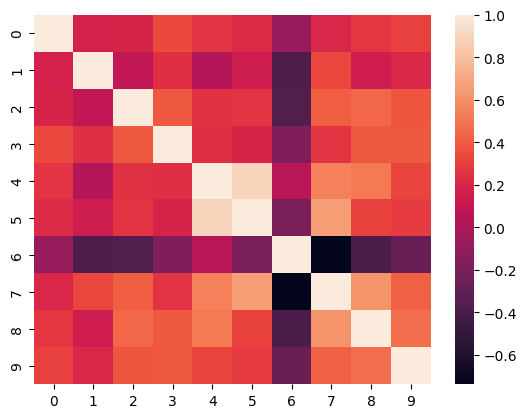

In [45]:
sns.heatmap(diabetes_features_df.corr())

In [60]:
from sklearn.decomposition import PCA

pca_features = PCA(n_components=4)
pca_features.fit(diabetes_features_df)
pca_features.explained_variance_ratio_
dimension_reduced_df = pca_features.transform(diabetes_features_df)

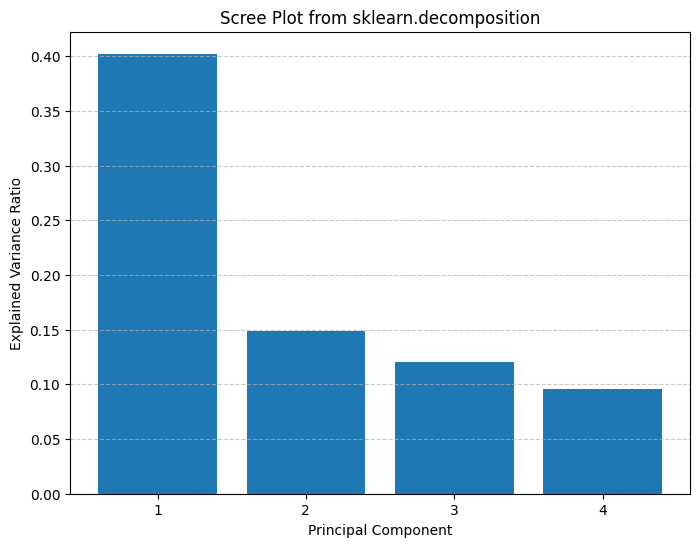

In [73]:
# Calculate the explained variance ratio, which the the percentage of variance captured by each principal component
explained_variance_ratio = pca_features.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center')
plt.title('Scree Plot from sklearn.decomposition')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dimension_reduced_df, y, test_size = 0.2, random_state = 42)

### OLS

In [67]:
check_ols = OrdinaryLeastSquaresRegression(intercept = True)
check_ols.fit(X_train_pca, y_train_pca)
print(f"Bias value using OLS: {check_ols.bias_}")
print('\n')
print(f"Coefficients using OLS: {check_ols.coeff_}")
print('\n')
y_pred = check_ols.predict(X_test_pca)
check_ols.adjusted_r_square(y_pred=y_pred, y_test=y_test)
check_ols.r_squared(y_pred = y_pred, y_test = y_test)
print(f"r square value: {check_ols.r_square}")
print(f"Adjusted r square value: {check_ols.adj_r_square}")

Bias value using OLS: 151.21095321102754


Coefficients using OLS: [ 445.58902466 -287.09851438  263.57562698  576.54308026]


r square value: 0.46988622709563765
Adjusted r square value: 0.43795166246284467


### Gradient Descent

In [68]:
train_standard = StandardScaler()
train_standard.fit(X_train_pca)
X_train_standard = train_standard.transform(X_train_pca)

In [69]:
check_gradient_descent = GradientDescentLinearRegression()
check_gradient_descent.gradient_descent(X_train_standard, y_train[:,np.newaxis])

In [70]:
print(f"Bias value using Gradient Descent: {check_gradient_descent.bias_}")
print('\n')
print(f"Coefficients using Gradient Descent: {check_gradient_descent.coeff_}")
test_standard = StandardScaler()
test_standard.fit(X_test)
X_test_standard = train_standard.transform(X_test_pca)
y_pred = check_gradient_descent.predict(X_test_standard)
check_gradient_descent.adjusted_r_square(y_pred=y_pred, y_test=y_test)
check_gradient_descent.r_squared(y_pred = y_pred, y_test = y_test)
print(f"r square value: {check_gradient_descent.r_square}")
print(f"Adjusted r square value: {check_gradient_descent.adj_r_square}")

Bias value using Gradient Descent: [153.73324978]


Coefficients using Gradient Descent: [[ 42.26597593]
 [-16.54032387]
 [ 14.00131996]
 [ 27.45263771]]
r square value: 0.0027514393064608893
Adjusted r square value: -0.057323775193149906


##### Findings
<li> After doing PCA and reducing the dimensions to 4, for a total explained variance ratio of 75%, OLS and Gradient descent perform similarly as before. </li>

## Visualization

In [81]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

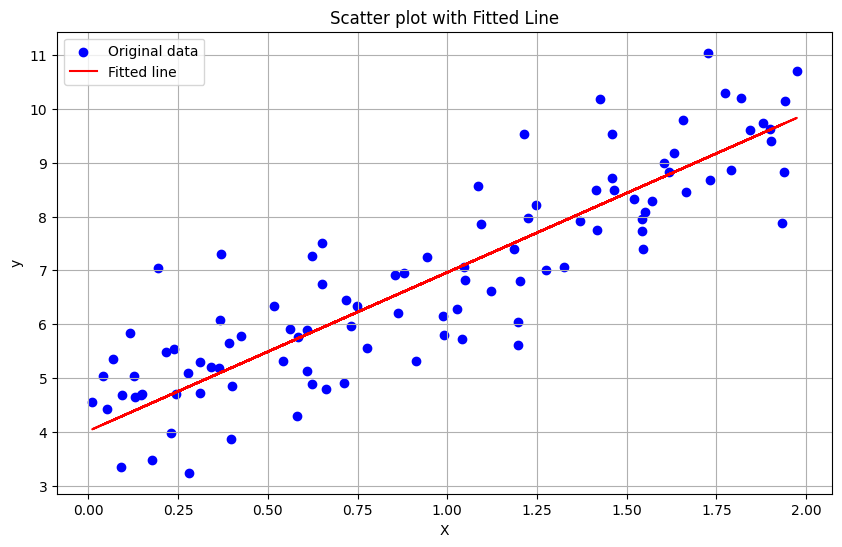

In [82]:
# Fit the GradientDescentLinearRegression model to the data
model = GradientDescentLinearRegression()
model.gradient_descent(X, y)

# Make predictions using the fitted model
y_pred = model.predict(X)

# Plot the scatter plot of the original data points and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()


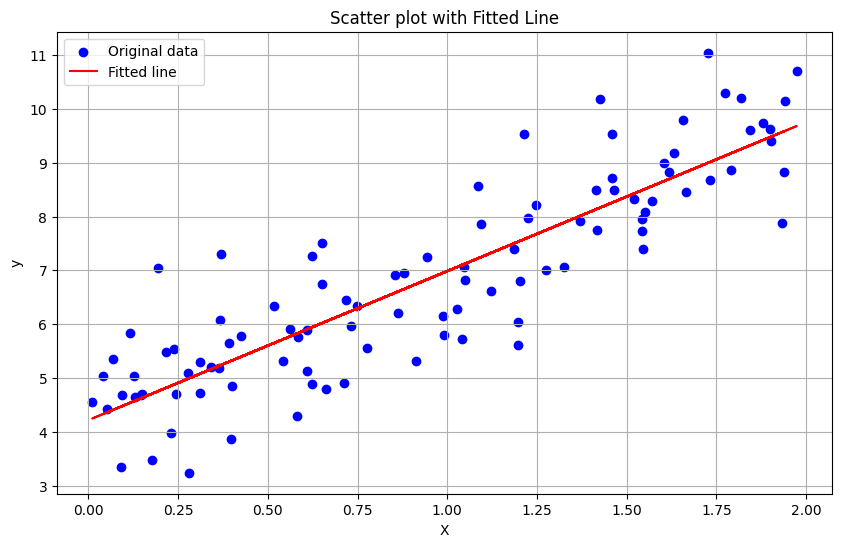

In [84]:
# Fit Ordinary Least Squares Regression model
ols_model = OrdinaryLeastSquaresRegression(intercept = True)
ols_model.fit(X, y)

# Predictions
y_pred = ols_model.predict(X)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()

## What we know

Actual Linear Regression equation:
$$ y = \beta_0 + \beta_1 \cdot x_{i1} + \ldots + \beta_n \cdot x_{in} + \epsilon_i $$

We need to get our best estimates for the values of $\beta$ using the sample data given to us:
$$ \hat{y} = b_0 + b_1 \cdot x_{i1} + \ldots + b_n \cdot x_{in} $$

Here, values of $\beta$ and $b$ can be represented as matrices.

$$  \quad \mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon} $$

$$  \quad \hat{\mathbf{y}} = X \mathbf{b} $$


The error term can then be
$$ e: (y - \hat{y})^2 $$
Our goal will be to minimize $e$ <br>
$e$ can also be written as
$$ e: (y - X \mathbf{b})^2 $$
$$ e: (y - X \mathbf{b})^T.(y_i - X \mathbf{b}) $$

We can minimize $e$ by
$$\frac{\partial}{\partial b} e = 0$$
$$\frac{\partial}{\partial b} (y - X \mathbf{b})^T.(y - X \mathbf{b}) = 0$$
$$\frac{\partial}{\partial b} (y^T - \mathbf{b}^TX^T).(y - X \mathbf{b}) = 0$$
$$\frac{\partial}{\partial b} (y^T - \mathbf{b}^TX^T).(y - X \mathbf{b}) = 0$$
$$\frac{\partial}{\partial b} (y^T.y - y^T.X.\mathbf{b} - \mathbf{b}^T.X^T.y + \mathbf{b}^T.X^T.X.\mathbf{b}) = 0$$
$$\frac{\partial}{\partial b} (y^T.y - 2\mathbf{b}^T.X^T.y + \mathbf{b}^T.X^T.X.\mathbf{b}) = 0$$
$$ -2X^T.y + 2(X^T.X).\mathbf{b} = 0$$
$$ 2(X^T.X)\mathbf{b} = 2.X^T.y $$
$$ (X^T.X)^{-1}.(X^T.X).\mathbf{b} = (X^T.X)^{-1}.X^T.y $$
$$ Hence, \mathbf{b} = (X^T.X)^{-1}.X^T.y $$